<a href="https://colab.research.google.com/github/mpatel5/decision-tree-regression-python/blob/main/Patel_Week6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree


# Load and preview data





In [ ]:
# Load dataset from a local folder
file_path = 'weight-height-1.csv' # sets the path of the local folder
data = pd.read_csv(file_path) #reads the file into a dataframe

# Display first 5 rows
print(data.head())

print("\n\nView the dataframe Info")
data.info()

# Dataset summary statistics
print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values Per Column (Original Dataset):")
print(data.isnull().sum())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


View the dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB

Summary Statistics:
             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699

Missing Values Per Column (Original Dataset):
Gender    0
Height    0
Weight    0
dtype: int64


# Data Preprocessing

In [ ]:
# Select features
X = data[['Height']].copy()

# Target variable
y = data['Weight'].copy()


# Impute missing values using the median
X["Height"] = X["Height"].fillna(X["Height"].median())
y = y.fillna(y.median())

# Display list of missing values by column
print("\n\nMissing values per column")
print(X.isnull().sum())
print("Weight missing:", y.isnull().sum())








Missing values per column
Height    0
dtype: int64
Weight missing: 0


# Split the data into sets for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build the decision tree model

In [ ]:
# Create the regression model
tree_model = DecisionTreeRegressor(
    criterion='squared_error',  # Mean Squared Error
    max_depth=4,
    random_state=42
)

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

# Make the predictions

In [ ]:
y_pred = tree_model.predict(X_test)

# Evaluate the model

In [ ]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.4f}")

# Accuracy as percentage
accuracy_percent = r2 * 100
print(f"\nModel Accuracy (R² %): {accuracy_percent:.2f}%")


Mean Absolute Error (MAE): 9.782
Root Mean Squared Error (RMSE): 12.321
R-squared (R²): 0.8544

Model Accuracy (R² %): 85.44%


# Visualize the model

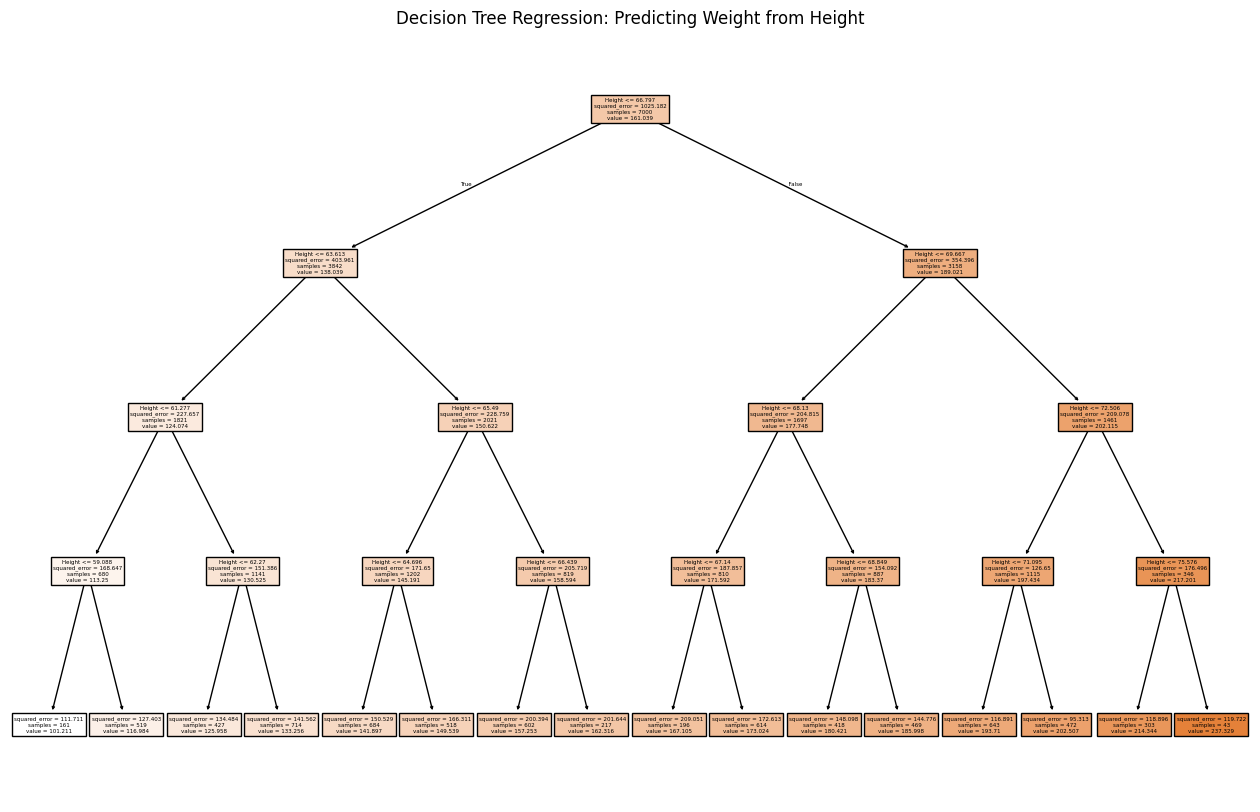

In [ ]:
plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=["Height"], filled=True)
plt.title("Decision Tree Regression: Predicting Weight from Height")
plt.show()